In [1399]:
import pandas as pd
import numpy as np
data_train = pd.read_csv('http://bit.ly/kaggletrain')
data_test = df = pd.read_csv('http://bit.ly/kaggletest')
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


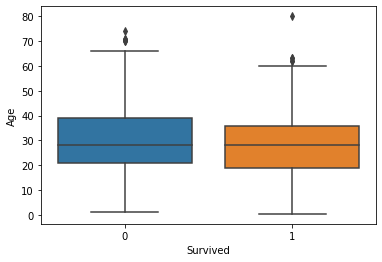

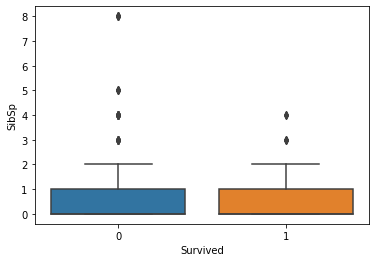

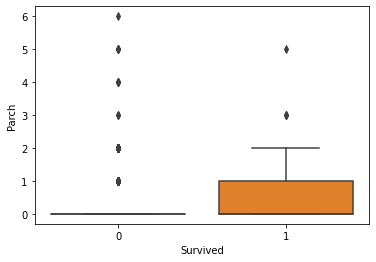

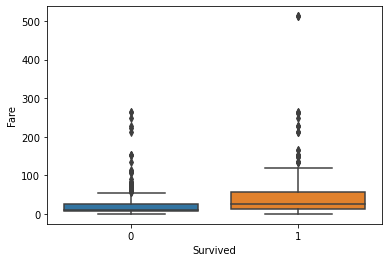

In [1400]:
import seaborn as sns
import matplotlib.pyplot as plt
features_col = ['Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked', 'Pclass']
output = 'Survived'
for n in features_col[0:4]:
    sns.boxplot(x=output, y=n, data=data_train)
    plt.show()
    

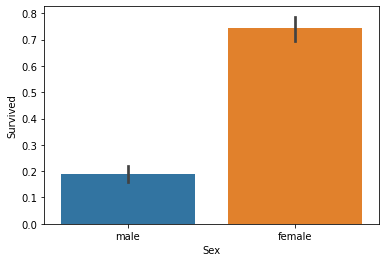

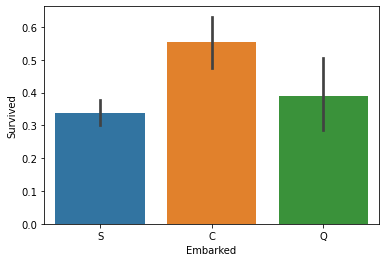

In [1401]:
for n in features_col[4:6]:
    sns.barplot(x=n,y=output, data=data_train)
    plt.show()

In [1402]:
data_train.shape
target = data_train["Survived"]
data_train = data_train.drop(["Survived"], axis=1)

In [1403]:
combined = data_train.append(data_test)
combined = combined.reset_index()

In [1404]:
combined = combined.drop(['index'], axis=1)

In [1405]:
combined.shape

(1309, 11)

In [1406]:
combined = combined.drop(['PassengerId'], axis=1)

In [1407]:
combined['Cabin'] = combined['Cabin'].fillna('Unk')
cabin_list = set()
for cabin in combined["Cabin"]:
    cabin_list.add(str(cabin)[0])

combined["Cabin"]= combined["Cabin"].map(lambda cabin: str(cabin)[0])
Cabin_dummies = pd.get_dummies(combined["Cabin"], prefix="Cabin")
combined = pd.concat([combined, Cabin_dummies], axis=1)
combined.drop('Cabin', axis=1, inplace=True)

In [1408]:
combined["Ticket_num"] = combined["Ticket"].map(lambda ticket : " " + ticket)
combined["Ticket_num"] = combined["Ticket_num"].map(lambda ticket : ticket.split(" ")[-1])
combined.loc[combined["Ticket_num"]=="LINE", "Ticket_num"] = 0
combined["Ticket_num"] = combined["Ticket_num"].map(lambda ticket : int(ticket))

combined["Ticket_nam"] = combined["Ticket"].map(lambda ticket : " " + ticket)
combined["Ticket_nam"] = combined["Ticket_nam"].map(lambda ticket : ticket.split(" ")[1] if len(ticket.split(" "))> 2 else "XXXX")
combined["Ticket_nam"] = combined["Ticket_nam"].map(lambda ticket : ticket.replace('/', ''))
combined["Ticket_nam"] = combined["Ticket_nam"].map(lambda ticket : ticket.replace('.', ''))

Ticket_dummies = pd.get_dummies(combined["Ticket_nam"], prefix="Ticket_nam")
combined = pd.concat([combined, Ticket_dummies], axis=1)
combined.drop('Ticket', axis=1, inplace=True)
combined.drop('Ticket_nam', axis=1, inplace=True)

In [1409]:
combined["Fare"] = combined["Fare"].fillna(combined.iloc[:891]["Fare"].median())

In [1410]:
combined["Embarked"] = combined["Embarked"].fillna("S")
Embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
combined = pd.concat([combined, Embarked_dummies], axis=1)

combined.drop('Embarked', axis=1, inplace=True)


In [1411]:
combined["Fam_size"] = combined["SibSp"] + combined["Parch"] + 1
combined['Large_Fam'] = combined['Fam_size'].map(lambda s: 1 if 4 <= s else 0)
combined['Small_Fam'] = combined['Fam_size'].map(lambda s: 1 if 2 <= s <= 3 else 0)
combined['Single'] = combined['Fam_size'].map(lambda s: 1 if s == 1 else 0)

In [1412]:
Pclass_dummies = pd.get_dummies(combined['Pclass'], prefix='Pclass')
combined = pd.concat([combined, Pclass_dummies], axis=1)

In [1413]:
combined['Sex']=combined['Sex'].map({'female':0, 'male':1})

In [1414]:
name_list = set()
for name in combined["Name"]:
    name_list.add(name.split(", ")[1].split(".")[0])

title = { "Dr": "Officer",
    "Rev": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Capt": "Officer",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "the Countess":"Royalty",
    "Lady" : "Royalty", 
    "Jonkheer" : "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",}

combined["Title"] = combined["Name"].map(lambda name:name.split(',')[1].split('.')[0].strip())
combined["Title"] = combined["Title"].map(title)
titles_dummies = pd.get_dummies(combined['Title'], prefix='Title')
combined = pd.concat([combined, titles_dummies], axis=1)
combined.drop('Name', axis=1, inplace=True)

In [1415]:
age_pred = combined.iloc[:891].groupby(['Sex', 'Title','Pclass'])
age_pred = age_pred.median()
age_pred = age_pred.reset_index()[['Sex', 'Title', 'Pclass', 'Age']]

def fill_age(row):
    age_row = age_pred.loc[(age_pred["Sex"]==row["Sex"])&
                             (age_pred["Pclass"]==row["Pclass"])&
                             (age_pred["Title"]==row["Title"])]
    return age_row["Age"].values[0]

combined['Age'] = combined.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
combined.drop('Title', axis=1, inplace=True)
combined.drop('Pclass', axis=1, inplace=True)
combined.drop('Fam_size', axis=1, inplace=True)
combined.drop('Parch', axis=1, inplace=True)
combined.drop('SibSp', axis=1, inplace=True)
combined

,Sex,Age,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,...,Single,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,22.0,7.2500,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,38.0,71.2833,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,26.0,7.9250,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
3,0,35.0,53.1000,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,1,35.0,8.0500,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1,26.0,8.0500,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
1305,0,39.0,108.9000,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1306,1,38.5,7.2500,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
1307,1,26.0,8.0500,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0


In [1416]:
train = combined.iloc[:891]
test = combined.iloc[891:]

In [1417]:
from sklearn.feature_selection import SelectKBest, chi2
feat_selec = SelectKBest(chi2, k=20)
train = feat_selec.fit_transform(train, target)
test = feat_selec.transform(test)
test = pd.DataFrame(test)
train = pd.DataFrame(train)

In [1418]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
logreg = LogisticRegression()
rfc = RandomForestClassifier()
nb = GaussianNB()
gbc = GradientBoostingClassifier()
models = [logreg, rfc, nb, gbc]
for clf in models: 
    scores = cross_val_score(clf, train, target, cv=10, scoring='accuracy')
    scores = scores.mean()
    print("The cv score of {0}".format(clf) + " is {0}.".format(scores))

The cv score of LogisticRegression() is 0.6274157303370786.
The cv score of RandomForestClassifier() is 0.8417727840199749.
The cv score of GaussianNB() is 0.666729088639201.
The cv score of GradientBoostingClassifier() is 0.8485268414481897.


In [1429]:
from sklearn.model_selection import GridSearchCV
param_grid = {   'max_depth' : [4, 6, 8, 'None'],
                 'n_estimators': range(50, 500, 25),
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [1, 2, 3, 10],
                 'min_samples_leaf': [1, 2, 3, 10],
                 'bootstrap': [True, False]
}
grid = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(train, target)
grid.best_params_

{'bootstrap': True,
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 125}

In [1430]:
param_grid2 = {
    "min_samples_leaf": np.arange(0.1, 1.5, 0.1),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt", 'auto'],
    "criterion": ["friedman_mse",  "mae", 'mse'],
    "n_estimators":range(50, 500, 25)
    } 
grid2 = GridSearchCV(gbc, param_grid2, cv=5, scoring='accuracy', n_jobs=-1)
grid2.fit(train, target)
grid2.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 8,
 'max_features': 'log2',
 'min_samples_leaf': 0.1,
 'n_estimators': 475}

In [1443]:
optimized_models = [RandomForestClassifier(max_depth=8, bootstrap=True, max_features='auto', min_samples_leaf=1, 
                                           min_samples_split=3, n_estimators=125), 
                    GradientBoostingClassifier(max_depth=8, criterion='friedman_mse', max_features='log2', 
                                               min_samples_leaf=0.1, n_estimators=475)]
for clf in optimized_models:
    scores = cross_val_score(clf, train, target, cv=10, scoring='accuracy')
    scores = scores.mean()
    print("The cv score of {0}".format(clf) + " is {0}.".format(scores))

The cv score of RandomForestClassifier(max_depth=8, min_samples_split=3, n_estimators=125) is 0.8328339575530587.
The cv score of GradientBoostingClassifier(max_depth=8, max_features='log2',
                           min_samples_leaf=0.1, n_estimators=475) is 0.8395006242197255.


In [1444]:
clf = RandomForestClassifier(max_depth=8, bootstrap=True, max_features='auto', min_samples_leaf=1, 
                                           min_samples_split=3, n_estimators=125)
clf.fit(train, target)
predictions = pd.DataFrame(clf.predict(test))
predictions.columns = ["Survived"]
submission = pd.concat([data_test["PassengerId"], predictions["Survived"]], axis=1)
submission.to_csv('titanic.csv', index=False)

In [1445]:
submission.to_csv('titanic.csv', index=False)